In [19]:
import datetime
import time
from datetime import timedelta
import numpy as np
import csv    #加载csv包便于读取csv文件
import zipfile
import os
import json
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

def date_2_timestamp(year,mon,day):
    tempString=str(year)+"-"+str(mon)+"-"+str(day)
    tempTime=time.strptime(tempString, "%Y-%m-%d")
    return time.mktime(tempTime)

def timestamp_2_date(un_time):
    return datetime.datetime.fromtimestamp(un_time)


def timestamp_removeDay_reduce(temp_timestamp):
    temp_date=timestamp_2_date(temp_timestamp)
    temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,1)
    return temp_timestamp

def timestamp_removeDay_add(temp_timestamp):
    temp_date=timestamp_2_date(temp_timestamp)
    if temp_date.month==12:
        return date_2_timestamp(temp_date.year+1,1,1)
    else:
        return date_2_timestamp(temp_date.year,temp_date.month+1,1)
    
def date_removeDay_reduce(temp_date):
    temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,1)
    return timestamp_2_date(temp_timestamp)

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

# 返回从最小到最大之间经过的时间戳，间隔为一个月
def max_min_2_timestampList(minDate,maxDate):    
    resList=[]
    resMap={}
    for single_date in daterange(minDate, maxDate):
        temp_date=date_removeDay_reduce(single_date)
        temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,temp_date.day)
        resMap[temp_timestamp]=1 

    for key in resMap.keys():
        resList.append(key)
    
    # print(resList)
    return sorted(resList)

def timestamp_2_string(temp_timestamp):
    temp_date=datetime.datetime.fromtimestamp(temp_timestamp)
    if temp_date.month<10:
        tempMonth="0"+str(temp_date.month)
    else:
        tempMonth=str(temp_date.month)
    return str(temp_date.year)+"-"+tempMonth


def autolabel_0(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(-4, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    # weight="semibold",
                    ha='center', va='bottom', fontsize=15)
        
        
def autolabel_1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    i=0
    for rect in rects:
        height = rect.get_height()
        if i in [0,3,4,6]:
            plt.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 15),  # 3 points vertical offset
                        textcoords="offset points",
                        # weight="semibold",
                        ha='center', va='bottom', fontsize=15)
            
        else:
            plt.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        # weight="semibold",
                        ha='center', va='bottom', fontsize=15)
        
        
        i+=1

/tmp/ipykernel_1686142/879414824.py:1: DtypeWarning: Columns (2,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/mnt/sde1/geth/nft_analyse_v1/data/nftflow/csv/nftFlow_final.csv")


41272
sum of attacker tx:  33229
sum of victim tx:  37413
total tx:  70640
list_key ['2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02']
list_value [1332, 9945, 6676, 2998, 2501, 7302, 2475]
list_key ['2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02']
list_value [1577, 11217, 7709, 3390, 2817, 8073, 2630]


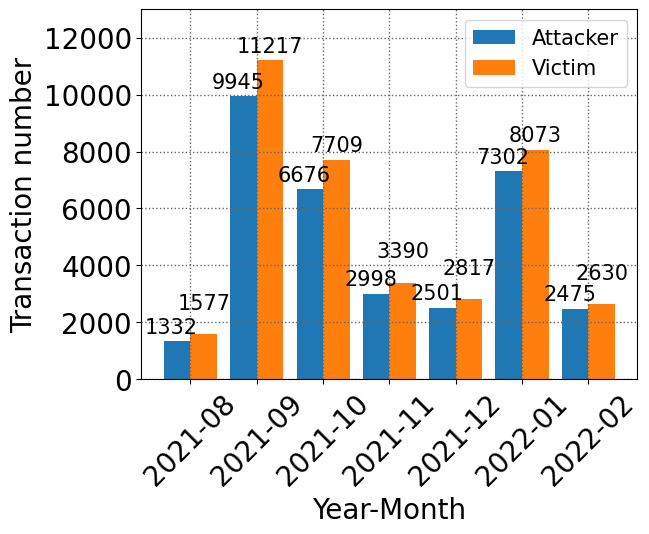

In [24]:

df=pd.read_csv("/mnt/sde1/geth/nft_analyse_v1/data/nftflow/csv/nftFlow_final.csv")
df = df[ (df["isError_1"]!="none") ]
print(len(df))


attacker_tx_Map={}
victim_tx_map={}
tx_set=set()

attacker_address_Map={}
victim_address_map={}

for index,row in df.iterrows():
    transactionHash_0=row["transactionHash_0"]
    transactionHash_1=row["transactionHash_1"]
    timestamp=row["timestamp"]
    timestamp=timestamp_removeDay_reduce(timestamp)
    
    attacker_tx_Map[transactionHash_0]=timestamp
    victim_tx_map[transactionHash_1]=timestamp
    
    tx_set.add(transactionHash_0)
    tx_set.add(transactionHash_1)

attacker_timestamp_Map = {}
for key,temp_timestamp in attacker_tx_Map.items():
    if temp_timestamp not in attacker_timestamp_Map:
        attacker_timestamp_Map[temp_timestamp]=0
    attacker_timestamp_Map[temp_timestamp]+=1
    

victim_timestamp_Map = {}
for key,temp_timestamp in victim_tx_map.items():
    if temp_timestamp not in victim_timestamp_Map:
        victim_timestamp_Map[temp_timestamp]=0
    victim_timestamp_Map[temp_timestamp]+=1
    
print("sum of attacker tx: ",len(attacker_tx_Map))
print("sum of victim tx: ",len(victim_tx_map))
print("total tx: ",len(tx_set))
#········································································
list_key=[]
list_value=[]
minDate=datetime.datetime.fromtimestamp( min(df["timestamp"]) )
maxDate=datetime.datetime.fromtimestamp( max(df["timestamp"]) )

for tempTimestamp in max_min_2_timestampList(minDate,maxDate):
    if tempTimestamp not in attacker_timestamp_Map:
        attacker_timestamp_Map[tempTimestamp]=0
    
    list_key.append(timestamp_2_string(tempTimestamp))
    list_value.append( attacker_timestamp_Map[tempTimestamp] )

# fig,axes=plt.subplots(1,1)
# ax=axes

# fig, ax = plt.subplots()
print("list_key",list_key)
print("list_value",list_value)

x = np.arange(len(list_key)) 
width = 0.4
# ax.bar(x - width/2,list_value,width,label='Attacker')

rects0=plt.bar(x - width/2,list_value,width,label="Attacker")

#········································································
list_key=[]
list_value=[]
minDate=datetime.datetime.fromtimestamp( min(df["timestamp"]) )
maxDate=datetime.datetime.fromtimestamp( max(df["timestamp"]) )

for tempTimestamp in max_min_2_timestampList(minDate,maxDate):
    if tempTimestamp not in victim_timestamp_Map:
        victim_timestamp_Map[tempTimestamp]=0
    
    list_key.append(timestamp_2_string(tempTimestamp))
    list_value.append( victim_timestamp_Map[tempTimestamp] )

print("list_key",list_key)
print("list_value",list_value)

# ax.bar(x + width/2,list_value,width,label='Victim')#label为标签
rects1=plt.bar(x + width/2,list_value,width,label="Victim")
autolabel_0(rects0)
autolabel_1(rects1)

plt.legend(fontsize=15)
plt.ylim(0,13000)
plt.ylabel('Transaction number', fontsize=20)
plt.xlabel('Year-Month', fontsize=20)
plt.xticks(ticks=x, labels=list_key, fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.grid(True, color='#666666', linestyle = ":", linewidth = "1")
plt.savefig("/mnt/sde1/geth/nft_analyse_v1/data/nftflow/photo/tx_num.pdf",bbox_inches='tight')



/tmp/ipykernel_1686142/4156584055.py:13: DtypeWarning: Columns (2,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/mnt/sde1/geth/nft_analyse_v1/data/nftflow/csv/nftFlow_final.csv")


41272
sum of attacker addr:  12421
sum of victim addr:  28010
total addr:  23701
list_key ['2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02']
list_value [562, 2216, 2357, 1232, 1362, 3029, 1663]
list_key ['2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02']
list_value [1457, 7092, 5748, 2793, 2571, 5850, 2499]


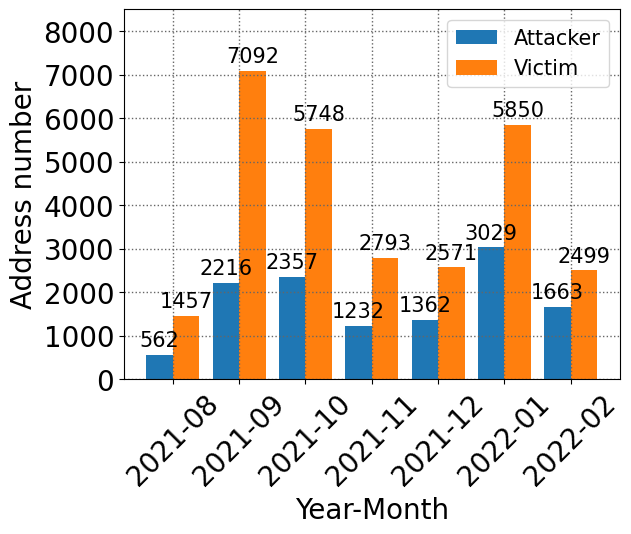

In [25]:
import numpy as np
import csv    #加载csv包便于读取csv文件
import zipfile
import os
import json
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

df=pd.read_csv("/mnt/sde1/geth/nft_analyse_v1/data/nftflow/csv/nftFlow_final.csv")
df = df[ (df["isError_1"]!="none") ]
print(len(df))


attacker_address_Map={}
victim_address_map={}

addrSet=set()

for index,row in df.iterrows():
    transactionHash_0=row["transactionHash_0"]
    transactionHash_1=row["transactionHash_1"]
    timestamp=row["timestamp"]
    timestamp=timestamp_removeDay_reduce(timestamp)

    
    tempKey=row["from_0"]+"_"+str(timestamp)
    attacker_address_Map[tempKey]=timestamp
    tempKey=row["to_0"]+"_"+str(timestamp)
    attacker_address_Map[tempKey]=timestamp
    
    tempKey=row["from_1"]+"_"+str(timestamp)
    victim_address_map[tempKey]=timestamp
    tempKey=row["to_1"]+"_"+str(timestamp)
    victim_address_map[tempKey]=timestamp
    
    addrSet.add(row["from_0"])
    addrSet.add(row["from_1"])
    

print("sum of attacker addr: ",len(attacker_address_Map))
print("sum of victim addr: ",len(victim_address_map))
print("total addr: ",len(addrSet))
    
attacker_timestamp_Map = {}
for key,temp_timestamp in attacker_address_Map.items():
    if temp_timestamp not in attacker_timestamp_Map:
        attacker_timestamp_Map[temp_timestamp]=0
    attacker_timestamp_Map[temp_timestamp]+=1
    

victim_timestamp_Map = {}
for key,temp_timestamp in victim_address_map.items():
    if temp_timestamp not in victim_timestamp_Map:
        victim_timestamp_Map[temp_timestamp]=0
    victim_timestamp_Map[temp_timestamp]+=1
    
#········································································
list_key=[]
list_value=[]
minDate=datetime.datetime.fromtimestamp( min(df["timestamp"]) )
maxDate=datetime.datetime.fromtimestamp( max(df["timestamp"]) )

for tempTimestamp in max_min_2_timestampList(minDate,maxDate):
    if tempTimestamp not in attacker_timestamp_Map:
        attacker_timestamp_Map[tempTimestamp]=0
    
    list_key.append(timestamp_2_string(tempTimestamp))
    list_value.append( attacker_timestamp_Map[tempTimestamp] )

# fig,axes=plt.subplots(1,1)
# ax=axes

fig, ax = plt.subplots()
print("list_key",list_key)
print("list_value",list_value)

x = np.arange(len(list_key)) 
width = 0.4
# ax.bar(x - width/2,list_value,width,label='Attacker')#label为标签

rects0=plt.bar(x - width/2,list_value,width,label="Attacker")

#········································································
list_key=[]
list_value=[]
minDate=datetime.datetime.fromtimestamp( min(df["timestamp"]) )
maxDate=datetime.datetime.fromtimestamp( max(df["timestamp"]) )

for tempTimestamp in max_min_2_timestampList(minDate,maxDate):
    if tempTimestamp not in victim_timestamp_Map:
        victim_timestamp_Map[tempTimestamp]=0
    
    list_key.append(timestamp_2_string(tempTimestamp))
    list_value.append( victim_timestamp_Map[tempTimestamp] )

print("list_key",list_key)
print("list_value",list_value)

# ax.bar(x + width/2,list_value,width,label='Victim')#label为标签
rects1=plt.bar(x + width/2,list_value,width,label="Victim")

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    # weight="semibold",
                    ha='center', va='bottom', fontsize=15)
        
autolabel(rects0)
autolabel(rects1)

plt.legend(fontsize=15)
plt.ylim(0,8500)
plt.ylabel('Address number', fontsize=20)
plt.xlabel('Year-Month', fontsize=20)
plt.xticks(ticks=x, labels=list_key, fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.grid(True, color='#666666', linestyle = ":", linewidth = "1")
plt.savefig("/mnt/sde1/geth/nft_analyse_v1/data/nftflow/photo/addr_num.pdf",bbox_inches='tight')

